In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from datetime import datetime
from collections import Counter

# Configure settings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load the Netflix dataset
# Update the path to your actual file location in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Netflix EDA/netflix_titles_2021.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print("=" * 60)
print("INITIAL DATA EXPLORATION")
print("=" * 60)

# Display basic information
print("\n Dataset Info:")
print(df.info())

print("\n First 5 rows:")
display(df.head())

print("\n Dataset shape:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\n Data types:")
print(df.dtypes.value_counts())

INITIAL DATA EXPLORATION

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

 First 5 rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



 Dataset shape:
Rows: 8807
Columns: 12

 Data types:
object    11
int64      1
Name: count, dtype: int64


In [7]:
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Check for missing values
print("\n Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df)

# Check for duplicates
print(f"\n Duplicate rows: {df.duplicated().sum()}")

# Check for unique values in each column
print("\n Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

DATA QUALITY ASSESSMENT

 Missing Values:
          Column  Missing_Count  Missing_Percentage
3       director           2634           29.908028
5        country            831            9.435676
4           cast            825            9.367549
6     date_added             10            0.113546
8         rating              4            0.045418
9       duration              3            0.034064
0        show_id              0            0.000000
1           type              0            0.000000
2          title              0            0.000000
7   release_year              0            0.000000
10     listed_in              0            0.000000
11   description              0            0.000000

 Duplicate rows: 0

 Unique values per column:
show_id: 8807
type: 2
title: 8807
director: 4528
cast: 7692
country: 748
date_added: 1767
release_year: 74
rating: 17
duration: 220
listed_in: 514
description: 8775


In [8]:
print("=" * 60)
print(" DATA CLEANING")
print("=" * 60)

# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values based on column type
print("Cleaning missing values...")

# For text columns, fill with 'Unknown' or appropriate values
text_columns = df_clean.select_dtypes(include=['object']).columns
for col in text_columns:
    if col in ['director', 'cast', 'country']:
        df_clean[col] = df_clean[col].fillna('Unknown')
    elif col in ['rating']:
        df_clean[col] = df_clean[col].fillna('Not Rated')
    elif col in ['description']:
        df_clean[col] = df_clean[col].fillna('No description available')

# Handle date columns if present
if 'date_added' in df_clean.columns:
    df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
final_rows = len(df_clean)

print(f" Removed {initial_rows - final_rows} duplicate rows")
print(f" Clean dataset shape: {df_clean.shape}")

# Display cleaned dataset info
print("\n Cleaned Dataset Missing Values:")
print(df_clean.isnull().sum())

 DATA CLEANING
Cleaning missing values...
 Removed 0 duplicate rows
 Clean dataset shape: (8807, 12)

 Cleaned Dataset Missing Values:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64


In [10]:
print("=" * 60)
print("BASIC STATISTICAL ANALYSIS")
print("=" * 60)

# Statistical summary for numerical columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print("\n Numerical columns statistics:")
    display(df_clean[numeric_cols].describe())

# Statistical summary for categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("\n Categorical columns summary:")
for col in categorical_cols[:5]:  # Show first 5 to avoid too much output
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df_clean[col].nunique()}")
    print("Top 5 values:")
    print(df_clean[col].value_counts().head())

BASIC STATISTICAL ANALYSIS

 Numerical columns statistics:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



 Categorical columns summary:

SHOW_ID:
Unique values: 8807
Top 5 values:
show_id
s8807    1
s1       1
s2       1
s3       1
s4       1
Name: count, dtype: int64

TYPE:
Unique values: 2
Top 5 values:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

TITLE:
Unique values: 8807
Top 5 values:
title
Zubaan                   1
Dick Johnson Is Dead     1
Blood & Water            1
Ganglands                1
Jailbirds New Orleans    1
Name: count, dtype: int64

DIRECTOR:
Unique values: 4529
Top 5 values:
director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

CAST:
Unique values: 7693
Top 5 values:
cast
Unknown                                                                                    825
David Attenborough                                                                          19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardw

CONTENT TYPE ANALYSIS


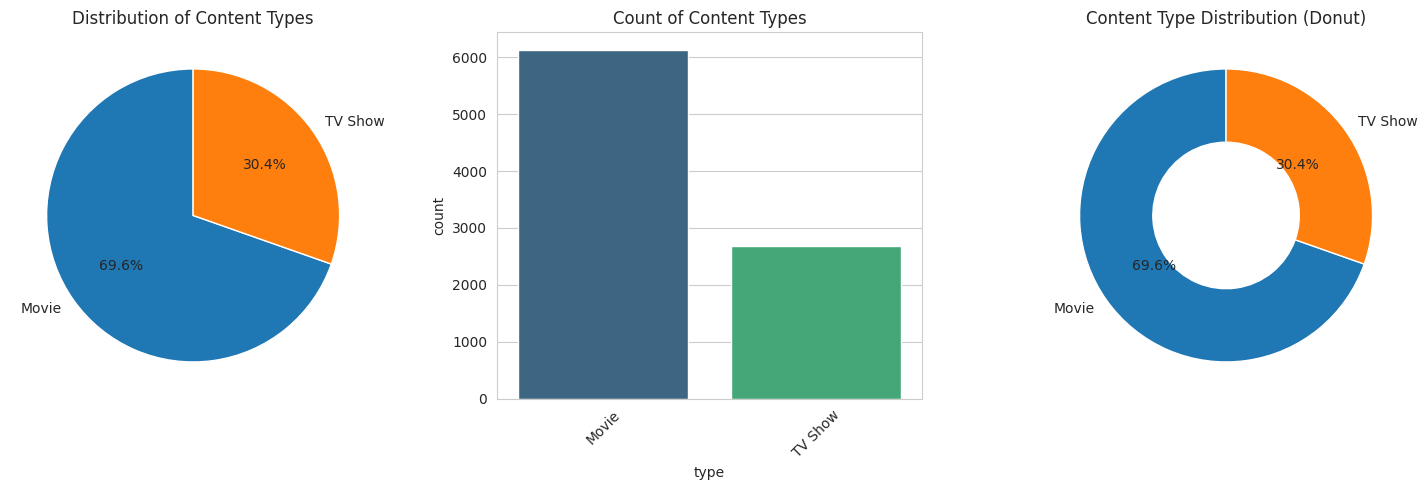


 Content Type Statistics:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Percentages:
type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64


In [13]:
print("=" * 60)
print("CONTENT TYPE ANALYSIS")
print("=" * 60)

# Analyze content types (Movies vs TV Shows)
if 'type' in df_clean.columns:
    plt.figure(figsize=(15, 5))

    # Pie chart
    plt.subplot(1, 3, 1)
    type_counts = df_clean['type'].value_counts()
    plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Content Types')

    # Bar chart
    plt.subplot(1, 3, 2)
    sns.countplot(data=df_clean, x='type', palette='viridis')
    plt.title('Count of Content Types')
    plt.xticks(rotation=45)

    # Donut chart
    plt.subplot(1, 3, 3)
    wedges, texts, autotexts = plt.pie(type_counts.values, labels=type_counts.index,
                                       autopct='%1.1f%%', startangle=90,
                                       wedgeprops=dict(width=0.5))
    plt.title('Content Type Distribution (Donut)')

    plt.tight_layout()
    plt.show()

    print(f"\n Content Type Statistics:")
    print(type_counts)
    print(f"\nPercentages:")
    print((type_counts / len(df_clean) * 100).round(2))

RELEASE YEAR ANALYSIS


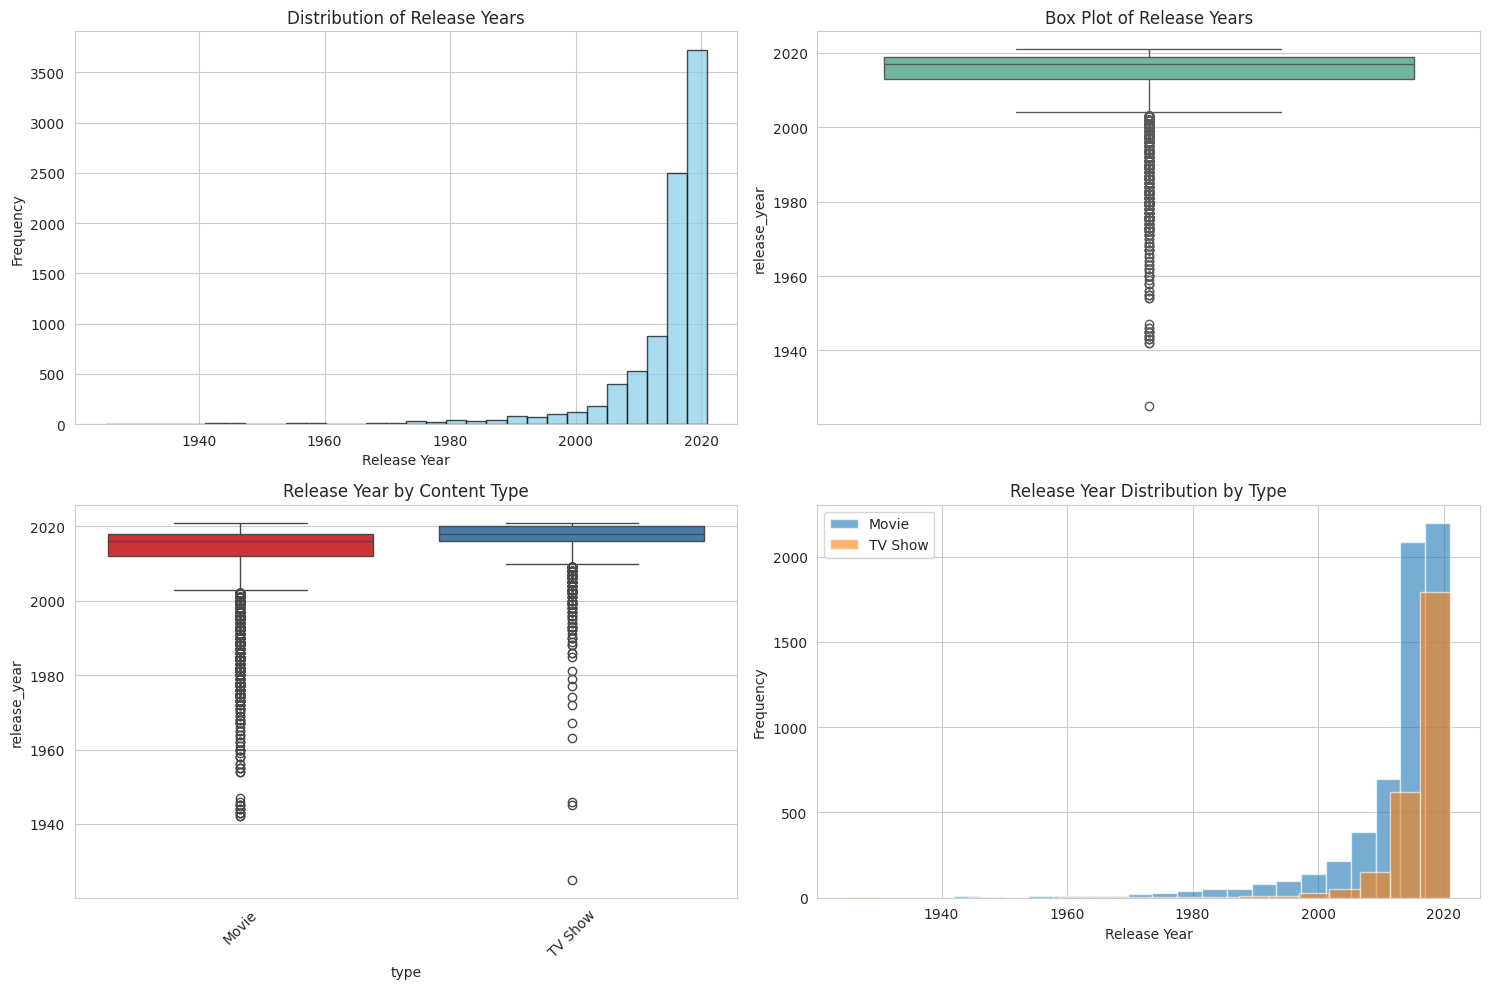


 Release Year Statistics:
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Oldest content: 1925
Newest content: 2021
Most common year: 2018


In [14]:
print("=" * 60)
print("RELEASE YEAR ANALYSIS")
print("=" * 60)

if 'release_year' in df_clean.columns:
    plt.figure(figsize=(15, 10))

    # Histogram of release years
    plt.subplot(2, 2, 1)
    plt.hist(df_clean['release_year'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Release Years')
    plt.xlabel('Release Year')
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(2, 2, 2)
    sns.boxplot(y=df_clean['release_year'], palette='Set2')
    plt.title('Box Plot of Release Years')

    # Release year by content type
    if 'type' in df_clean.columns:
        plt.subplot(2, 2, 3)
        sns.boxplot(data=df_clean, x='type', y='release_year', palette='Set1')
        plt.title('Release Year by Content Type')
        plt.xticks(rotation=45)

        plt.subplot(2, 2, 4)
        for content_type in df_clean['type'].unique():
            data = df_clean[df_clean['type'] == content_type]['release_year']
            plt.hist(data, alpha=0.6, label=content_type, bins=20)
        plt.title('Release Year Distribution by Type')
        plt.xlabel('Release Year')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"\n Release Year Statistics:")
    print(df_clean['release_year'].describe())

    print(f"\nOldest content: {df_clean['release_year'].min()}")
    print(f"Newest content: {df_clean['release_year'].max()}")
    print(f"Most common year: {df_clean['release_year'].mode().iloc[0]}")

COUNTRY AND DIRECTOR ANALYSIS


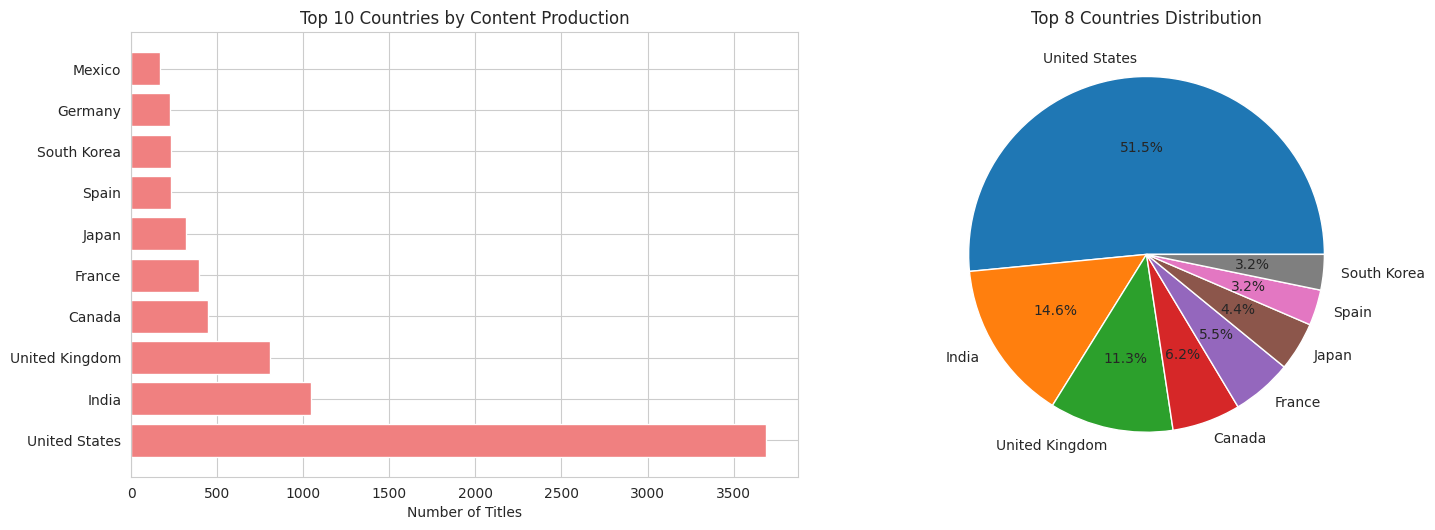

Top 10 countries by content:
1. United States: 3690
2. India: 1046
3. United Kingdom: 806
4. Canada: 445
5. France: 393
6. Japan: 318
7. Spain: 232
8. South Korea: 231
9. Germany: 226
10. Mexico: 169


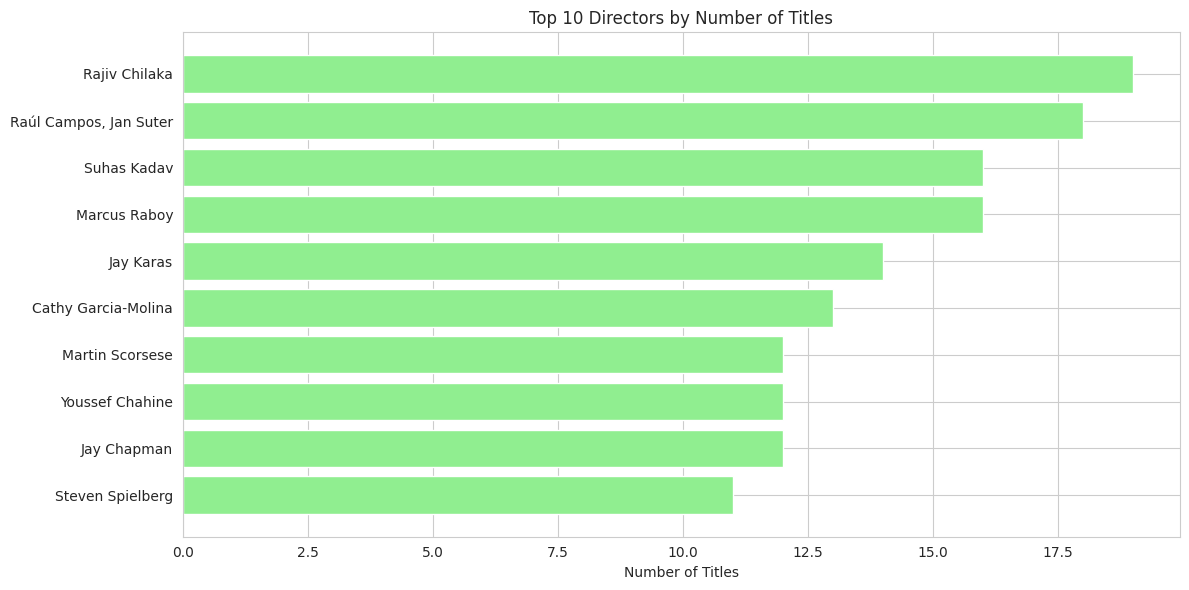


 Top 10 directors:
1. Rajiv Chilaka: 19
2. Raúl Campos, Jan Suter: 18
3. Suhas Kadav: 16
4. Marcus Raboy: 16
5. Jay Karas: 14
6. Cathy Garcia-Molina: 13
7. Martin Scorsese: 12
8. Youssef Chahine: 12
9. Jay Chapman: 12
10. Steven Spielberg: 11


In [15]:
print("=" * 60)
print("COUNTRY AND DIRECTOR ANALYSIS")
print("=" * 60)

# Country analysis
if 'country' in df_clean.columns:
    # Split countries (many entries have multiple countries)
    all_countries = []
    for countries in df_clean['country'].dropna():
        if countries != 'Unknown':
            country_list = [country.strip() for country in countries.split(',')]
            all_countries.extend(country_list)

    country_counts = Counter(all_countries)
    top_countries = dict(country_counts.most_common(15))

    plt.figure(figsize=(15, 10))

    # Top countries bar plot
    plt.subplot(2, 2, 1)
    countries = list(top_countries.keys())
    counts = list(top_countries.values())
    plt.barh(countries[:10], counts[:10], color='lightcoral')
    plt.title('Top 10 Countries by Content Production')
    plt.xlabel('Number of Titles')

    # Pie chart for top countries
    plt.subplot(2, 2, 2)
    plt.pie(counts[:8], labels=countries[:8], autopct='%1.1f%%')
    plt.title('Top 8 Countries Distribution')

    plt.tight_layout()
    plt.show()

    print(f"Top 10 countries by content:")
    for i, (country, count) in enumerate(list(top_countries.items())[:10], 1):
        print(f"{i}. {country}: {count}")

# Director analysis
if 'director' in df_clean.columns:
    director_counts = df_clean['director'].value_counts()
    top_directors = director_counts[director_counts.index != 'Unknown'].head(10)

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_directors)), top_directors.values, color='lightgreen')
    plt.yticks(range(len(top_directors)), top_directors.index)
    plt.title('Top 10 Directors by Number of Titles')
    plt.xlabel('Number of Titles')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print(f"\n Top 10 directors:")
    for i, (director, count) in enumerate(top_directors.items(), 1):
        print(f"{i}. {director}: {count}")

RATING ANALYSIS


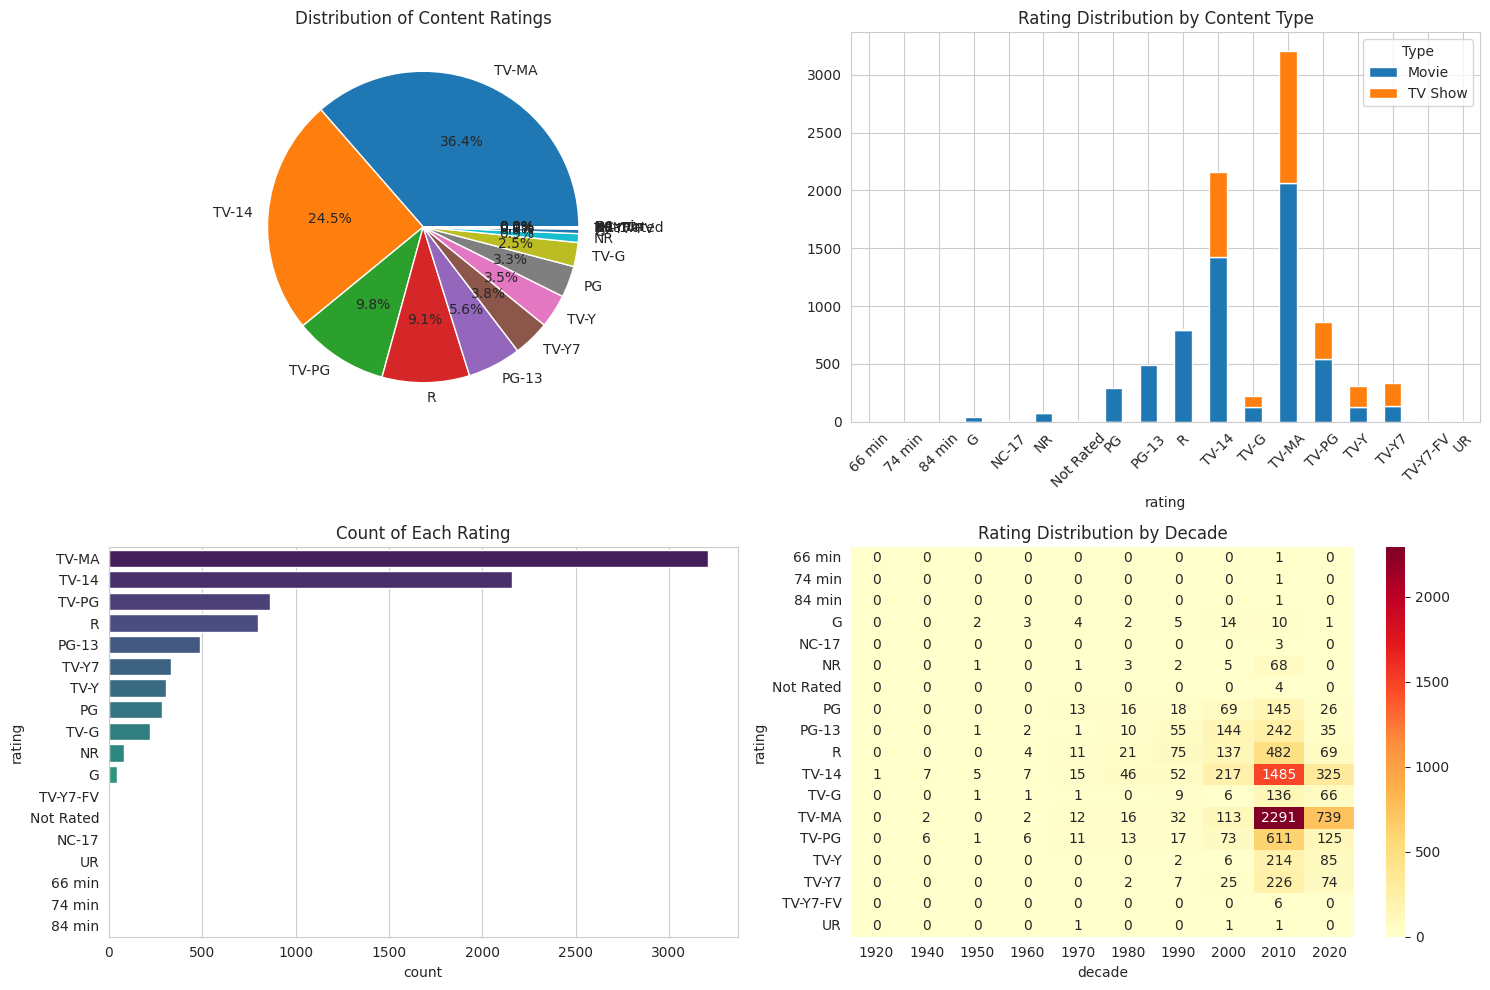

Rating Statistics:
rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

Percentages:
rating
TV-MA        36.41
TV-14        24.53
TV-PG         9.80
R             9.07
PG-13         5.56
TV-Y7         3.79
TV-Y          3.49
PG            3.26
TV-G          2.50
NR            0.91
G             0.47
TV-Y7-FV      0.07
Not Rated     0.05
NC-17         0.03
UR            0.03
66 min        0.01
74 min        0.01
84 min        0.01
Name: count, dtype: float64


In [16]:
print("=" * 60)
print("RATING ANALYSIS")
print("=" * 60)

if 'rating' in df_clean.columns:
    plt.figure(figsize=(15, 10))

    # Rating distribution
    plt.subplot(2, 2, 1)
    rating_counts = df_clean['rating'].value_counts()
    plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Content Ratings')

    # Rating by content type
    if 'type' in df_clean.columns:
        plt.subplot(2, 2, 2)
        rating_type_crosstab = pd.crosstab(df_clean['rating'], df_clean['type'])
        rating_type_crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Rating Distribution by Content Type')
        plt.xticks(rotation=45)
        plt.legend(title='Type')

    # Bar plot of ratings
    plt.subplot(2, 2, 3)
    sns.countplot(data=df_clean, y='rating', order=rating_counts.index, palette='viridis')
    plt.title('Count of Each Rating')

    # Rating vs Release Year (if both exist)
    if 'release_year' in df_clean.columns:
        plt.subplot(2, 2, 4)
        # Create a heatmap of rating vs decade
        df_temp = df_clean.copy()
        df_temp['decade'] = (df_temp['release_year'] // 10) * 10
        rating_decade = pd.crosstab(df_temp['rating'], df_temp['decade'])
        sns.heatmap(rating_decade, annot=True, fmt='d', cmap='YlOrRd')
        plt.title('Rating Distribution by Decade')

    plt.tight_layout()
    plt.show()

    print(f"Rating Statistics:")
    print(rating_counts)
    print(f"\nPercentages:")
    print((rating_counts / len(df_clean) * 100).round(2))

DURATION ANALYSIS


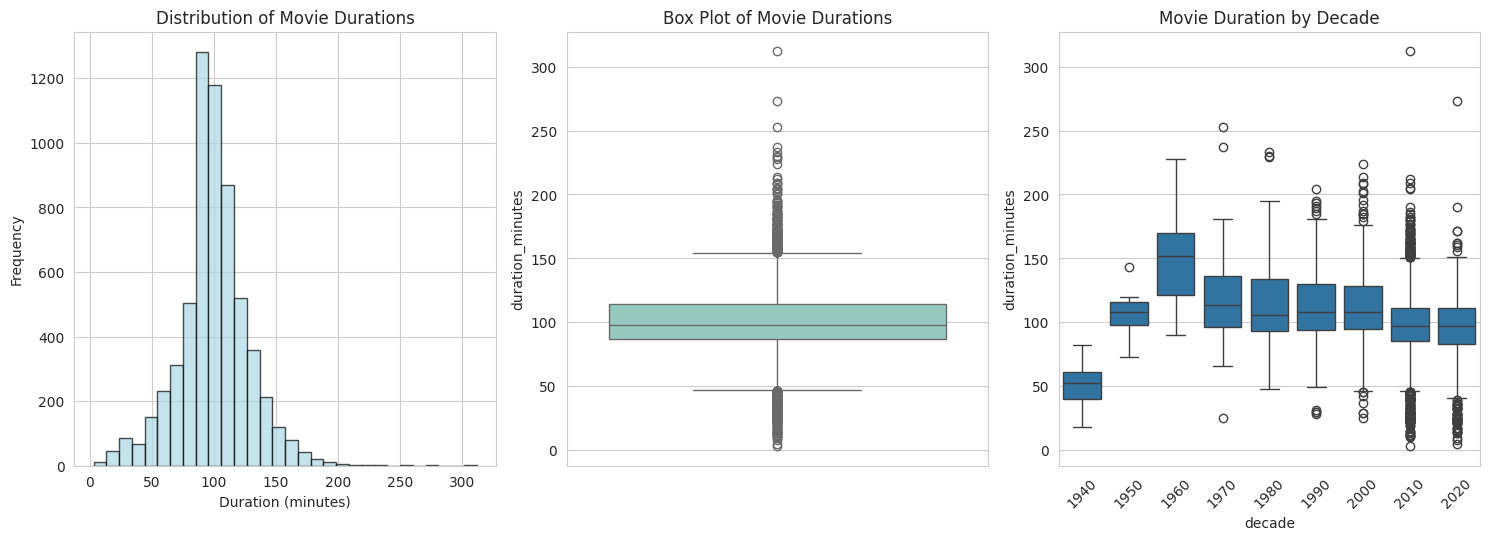

🎬 Movie Duration Statistics:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64


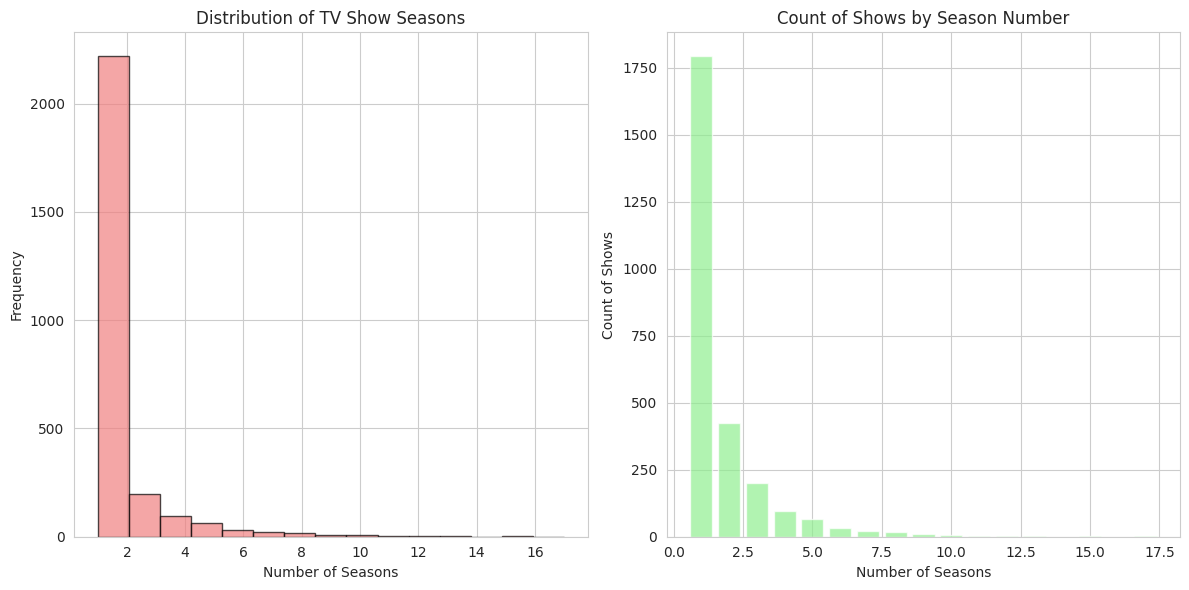


 TV Show Seasons Statistics:
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: seasons, dtype: float64


In [18]:
print("=" * 60)
print("DURATION ANALYSIS")
print("=" * 60)

if 'duration' in df_clean.columns:
    # Separate movies and TV shows
    movies_df = df_clean[df_clean['type'] == 'Movie'].copy() if 'type' in df_clean.columns else df_clean.copy()
    tv_shows_df = df_clean[df_clean['type'] == 'TV Show'].copy() if 'type' in df_clean.columns else pd.DataFrame()

    # Extract numeric duration for movies (assuming format like "90 min")
    if not movies_df.empty:
        movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

        plt.figure(figsize=(15, 10))

        # Movie duration histogram
        plt.subplot(2, 3, 1)
        plt.hist(movies_df['duration_minutes'].dropna(), bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        plt.title('Distribution of Movie Durations')
        plt.xlabel('Duration (minutes)')
        plt.ylabel('Frequency')

        # Box plot
        plt.subplot(2, 3, 2)
        sns.boxplot(y=movies_df['duration_minutes'], palette='Set3')
        plt.title('Box Plot of Movie Durations')

        # Duration by decade
        if 'release_year' in movies_df.columns:
            movies_df['decade'] = (movies_df['release_year'] // 10) * 10
            plt.subplot(2, 3, 3)
            sns.boxplot(data=movies_df, x='decade', y='duration_minutes')
            plt.title('Movie Duration by Decade')
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        print(f"🎬 Movie Duration Statistics:")
        print(movies_df['duration_minutes'].describe())

    # TV Show seasons analysis
    if not tv_shows_df.empty:
        tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.hist(tv_shows_df['seasons'].dropna(), bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
        plt.title('Distribution of TV Show Seasons')
        plt.xlabel('Number of Seasons')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        season_counts = tv_shows_df['seasons'].value_counts().sort_index()
        plt.bar(season_counts.index, season_counts.values, color='lightgreen', alpha=0.7)
        plt.title('Count of Shows by Season Number')
        plt.xlabel('Number of Seasons')
        plt.ylabel('Count of Shows')

        plt.tight_layout()
        plt.show()

        print(f"\n TV Show Seasons Statistics:")
        print(tv_shows_df['seasons'].describe())

GENRE ANALYSIS


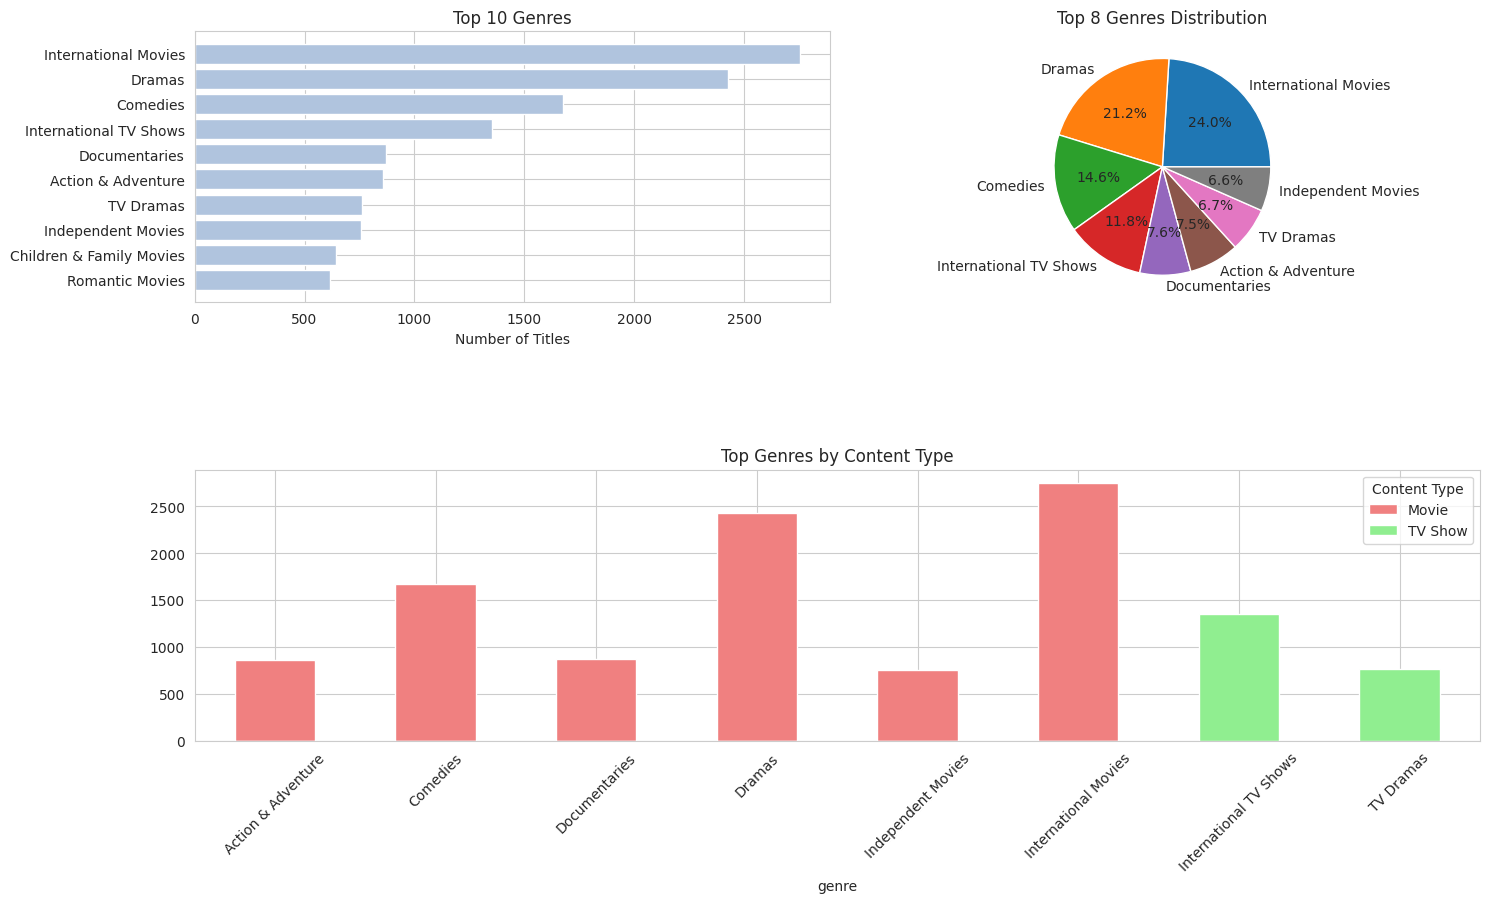

🎭 Top 15 genres:
1. International Movies: 2752
2. Dramas: 2427
3. Comedies: 1674
4. International TV Shows: 1351
5. Documentaries: 869
6. Action & Adventure: 859
7. TV Dramas: 763
8. Independent Movies: 756
9. Children & Family Movies: 641
10. Romantic Movies: 616
11. TV Comedies: 581
12. Thrillers: 577
13. Crime TV Shows: 470
14. Kids' TV: 451
15. Docuseries: 395


In [20]:
print("=" * 60)
print("GENRE ANALYSIS")
print("=" * 60)

if 'listed_in' in df_clean.columns:  # Netflix uses 'listed_in' for genres
    # Extract all genres
    all_genres = []
    for genres in df_clean['listed_in'].dropna():
        genre_list = [genre.strip() for genre in genres.split(',')]
        all_genres.extend(genre_list)

    genre_counts = Counter(all_genres)
    top_genres = dict(genre_counts.most_common(15))

    plt.figure(figsize=(15, 12))

    # Top genres bar plot
    plt.subplot(3, 2, 1)
    genres = list(top_genres.keys())[:10]
    counts = list(top_genres.values())[:10]
    plt.barh(genres, counts, color='lightsteelblue')
    plt.title('Top 10 Genres')
    plt.xlabel('Number of Titles')
    plt.gca().invert_yaxis()

    # Genre pie chart
    plt.subplot(3, 2, 2)
    plt.pie(counts[:8], labels=genres[:8], autopct='%1.1f%%')
    plt.title('Top 8 Genres Distribution')

    # Genre by content type
    if 'type' in df_clean.columns:
        # Create genre-type analysis
        genre_type_data = []
        for idx, row in df_clean.iterrows():
            if pd.notna(row['listed_in']):
                content_type = row['type']
                for genre in row['listed_in'].split(','):
                    genre_type_data.append({'genre': genre.strip(), 'type': content_type})

        genre_type_df = pd.DataFrame(genre_type_data)
        top_genre_names = genres[:8]
        filtered_genre_type = genre_type_df[genre_type_df['genre'].isin(top_genre_names)]

        plt.subplot(3, 1, 2)
        genre_type_crosstab = pd.crosstab(filtered_genre_type['genre'], filtered_genre_type['type'])
        genre_type_crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'lightgreen'])
        plt.title('Top Genres by Content Type')
        plt.xticks(rotation=45)
        plt.legend(title='Content Type')

    plt.tight_layout()
    plt.show()

    print(f"🎭 Top 15 genres:")
    for i, (genre, count) in enumerate(list(top_genres.items())[:15], 1):
        print(f"{i}. {genre}: {count}")

In [21]:
print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Select numeric columns for correlation
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
print(f"Numeric columns found: {list(numeric_columns)}")

if len(numeric_columns) > 1:
    # Calculate correlation matrix
    correlation_matrix = df_clean[numeric_columns].corr()

    plt.figure(figsize=(12, 10))

    # Heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')

    # Clustermap
    plt.subplot(2, 2, 2)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0)
    plt.title('Upper Triangle Correlation Matrix')

    plt.tight_layout()
    plt.show()

    print("Correlation Matrix:")
    print(correlation_matrix)

    # Find strong correlations
    threshold = 0.5
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                strong_correlations.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': corr_val
                })

    if strong_correlations:
        print(f"\n🔗 Strong correlations (|r| > {threshold}):")
        for corr in strong_correlations:
            print(f"{corr['Feature 1']} vs {corr['Feature 2']}: {corr['Correlation']:.3f}")
    else:
        print(f"\n No strong correlations found (|r| > {threshold})")

else:
    print("Not enough numeric columns for correlation analysis")

CORRELATION ANALYSIS
Numeric columns found: ['release_year']
Not enough numeric columns for correlation analysis


In [22]:
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Create new features
df_engineered = df_clean.copy()

# 1. Content age (years since release)
if 'release_year' in df_engineered.columns:
    current_year = 2021  # Based on dataset year
    df_engineered['content_age'] = current_year - df_engineered['release_year']
    print(f"Created 'content_age' feature")

# 2. Decade categorization
if 'release_year' in df_engineered.columns:
    df_engineered['decade'] = (df_engineered['release_year'] // 10) * 10
    df_engineered['decade_category'] = df_engineered['decade'].apply(lambda x:
        '1980s and earlier' if x <= 1980 else
        '1990s' if x == 1990 else
        '2000s' if x == 2000 else
        '2010s' if x == 2010 else
        '2020s')
    print(f"Created decade categorization features")

# 3. Duration categories for movies
if 'duration' in df_engineered.columns and 'type' in df_engineered.columns:
    # For movies
    movies_mask = df_engineered['type'] == 'Movie'
    df_engineered.loc[movies_mask, 'duration_minutes'] = df_engineered.loc[movies_mask, 'duration'].str.extract('(\d+)').astype(float)

    df_engineered.loc[movies_mask, 'duration_category'] = df_engineered.loc[movies_mask, 'duration_minutes'].apply(lambda x:
        'Short' if pd.notna(x) and x < 90 else
        'Medium' if pd.notna(x) and 90 <= x < 120 else
        'Long' if pd.notna(x) and x >= 120 else
        'Unknown')

    # For TV shows
    tv_mask = df_engineered['type'] == 'TV Show'
    df_engineered.loc[tv_mask, 'seasons_count'] = df_engineered.loc[tv_mask, 'duration'].str.extract('(\d+)').astype(float)

    df_engineered.loc[tv_mask, 'series_length'] = df_engineered.loc[tv_mask, 'seasons_count'].apply(lambda x:
        'Short Series' if pd.notna(x) and x == 1 else
        'Medium Series' if pd.notna(x) and 2 <= x <= 4 else
        'Long Series' if pd.notna(x) and x > 4 else
        'Unknown')

    print(f"Created duration categorization features")

# 4. Genre count and primary genre
if 'listed_in' in df_engineered.columns:
    df_engineered['genre_count'] = df_engineered['listed_in'].apply(lambda x:
        len(x.split(',')) if pd.notna(x) else 0)

    df_engineered['primary_genre'] = df_engineered['listed_in'].apply(lambda x:
        x.split(',')[0].strip() if pd.notna(x) and x else 'Unknown')

    print(f"Created genre-related features")

# 5. Country count (for international content)
if 'country' in df_engineered.columns:
    df_engineered['country_count'] = df_engineered['country'].apply(lambda x:
        len(x.split(',')) if pd.notna(x) and x != 'Unknown' else 0)

    df_engineered['is_international'] = df_engineered['country_count'] > 1

    print(f"Created country-related features")

# 6. Description length and word count
if 'description' in df_engineered.columns:
    df_engineered['description_length'] = df_engineered['description'].apply(lambda x:
        len(x) if pd.notna(x) else 0)

    df_engineered['description_word_count'] = df_engineered['description'].apply(lambda x:
        len(x.split()) if pd.notna(x) else 0)

    print(f"Created description-related features")

# 7. Rating categories
if 'rating' in df_engineered.columns:
    # Group ratings into broader categories
    rating_groups = {
        'Kids': ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G'],
        'Teen': ['PG', 'TV-PG', 'PG-13', 'TV-14'],
        'Adult': ['R', 'TV-MA', 'NC-17'],
        'Unrated': ['NR', 'UR', 'Not Rated']
    }

    df_engineered['rating_category'] = 'Other'
    for category, ratings in rating_groups.items():
        df_engineered.loc[df_engineered['rating'].isin(ratings), 'rating_category'] = category

    print(f"Created rating categorization feature")

# Display new features
new_columns = [col for col in df_engineered.columns if col not in df_clean.columns]
print(f"\n New features created: {new_columns}")
print(f" Dataset shape after feature engineering: {df_engineered.shape}")

# Show sample of engineered features
if new_columns:
    print(f"\n Sample of new features:")
    display(df_engineered[new_columns + ['title']].head())

FEATURE ENGINEERING
Created 'content_age' feature
Created decade categorization features
Created duration categorization features
Created genre-related features
Created country-related features
Created description-related features
Created rating categorization feature

 New features created: ['content_age', 'decade', 'decade_category', 'duration_minutes', 'duration_category', 'seasons_count', 'series_length', 'genre_count', 'primary_genre', 'country_count', 'is_international', 'description_length', 'description_word_count', 'rating_category']
 Dataset shape after feature engineering: (8807, 26)

 Sample of new features:


,content_age,decade,decade_category,duration_minutes,duration_category,seasons_count,series_length,genre_count,primary_genre,country_count,is_international,description_length,description_word_count,rating_category,title
0,1,2020,2020s,NaN,Unknown,NaN,NaN,1,Documentaries,1,False,152,27,Teen,Dick Johnson Is Dead
1,0,2020,2020s,NaN,NaN,NaN,Unknown,3,International TV Shows,1,False,147,27,Adult,Blood & Water
2,0,2020,2020s,NaN,NaN,NaN,Unknown,3,Crime TV Shows,0,False,146,27,Adult,Ganglands
3,0,2020,2020s,NaN,NaN,NaN,Unknown,2,Docuseries,0,False,147,24,Adult,Jailbirds New Orleans
4,0,2020,2020s,NaN,NaN,NaN,Unknown,3,International TV Shows,1,False,152,24,Adult,Kota Factory


ADVANCED VISUALIZATIONS WITH ENGINEERED FEATURES


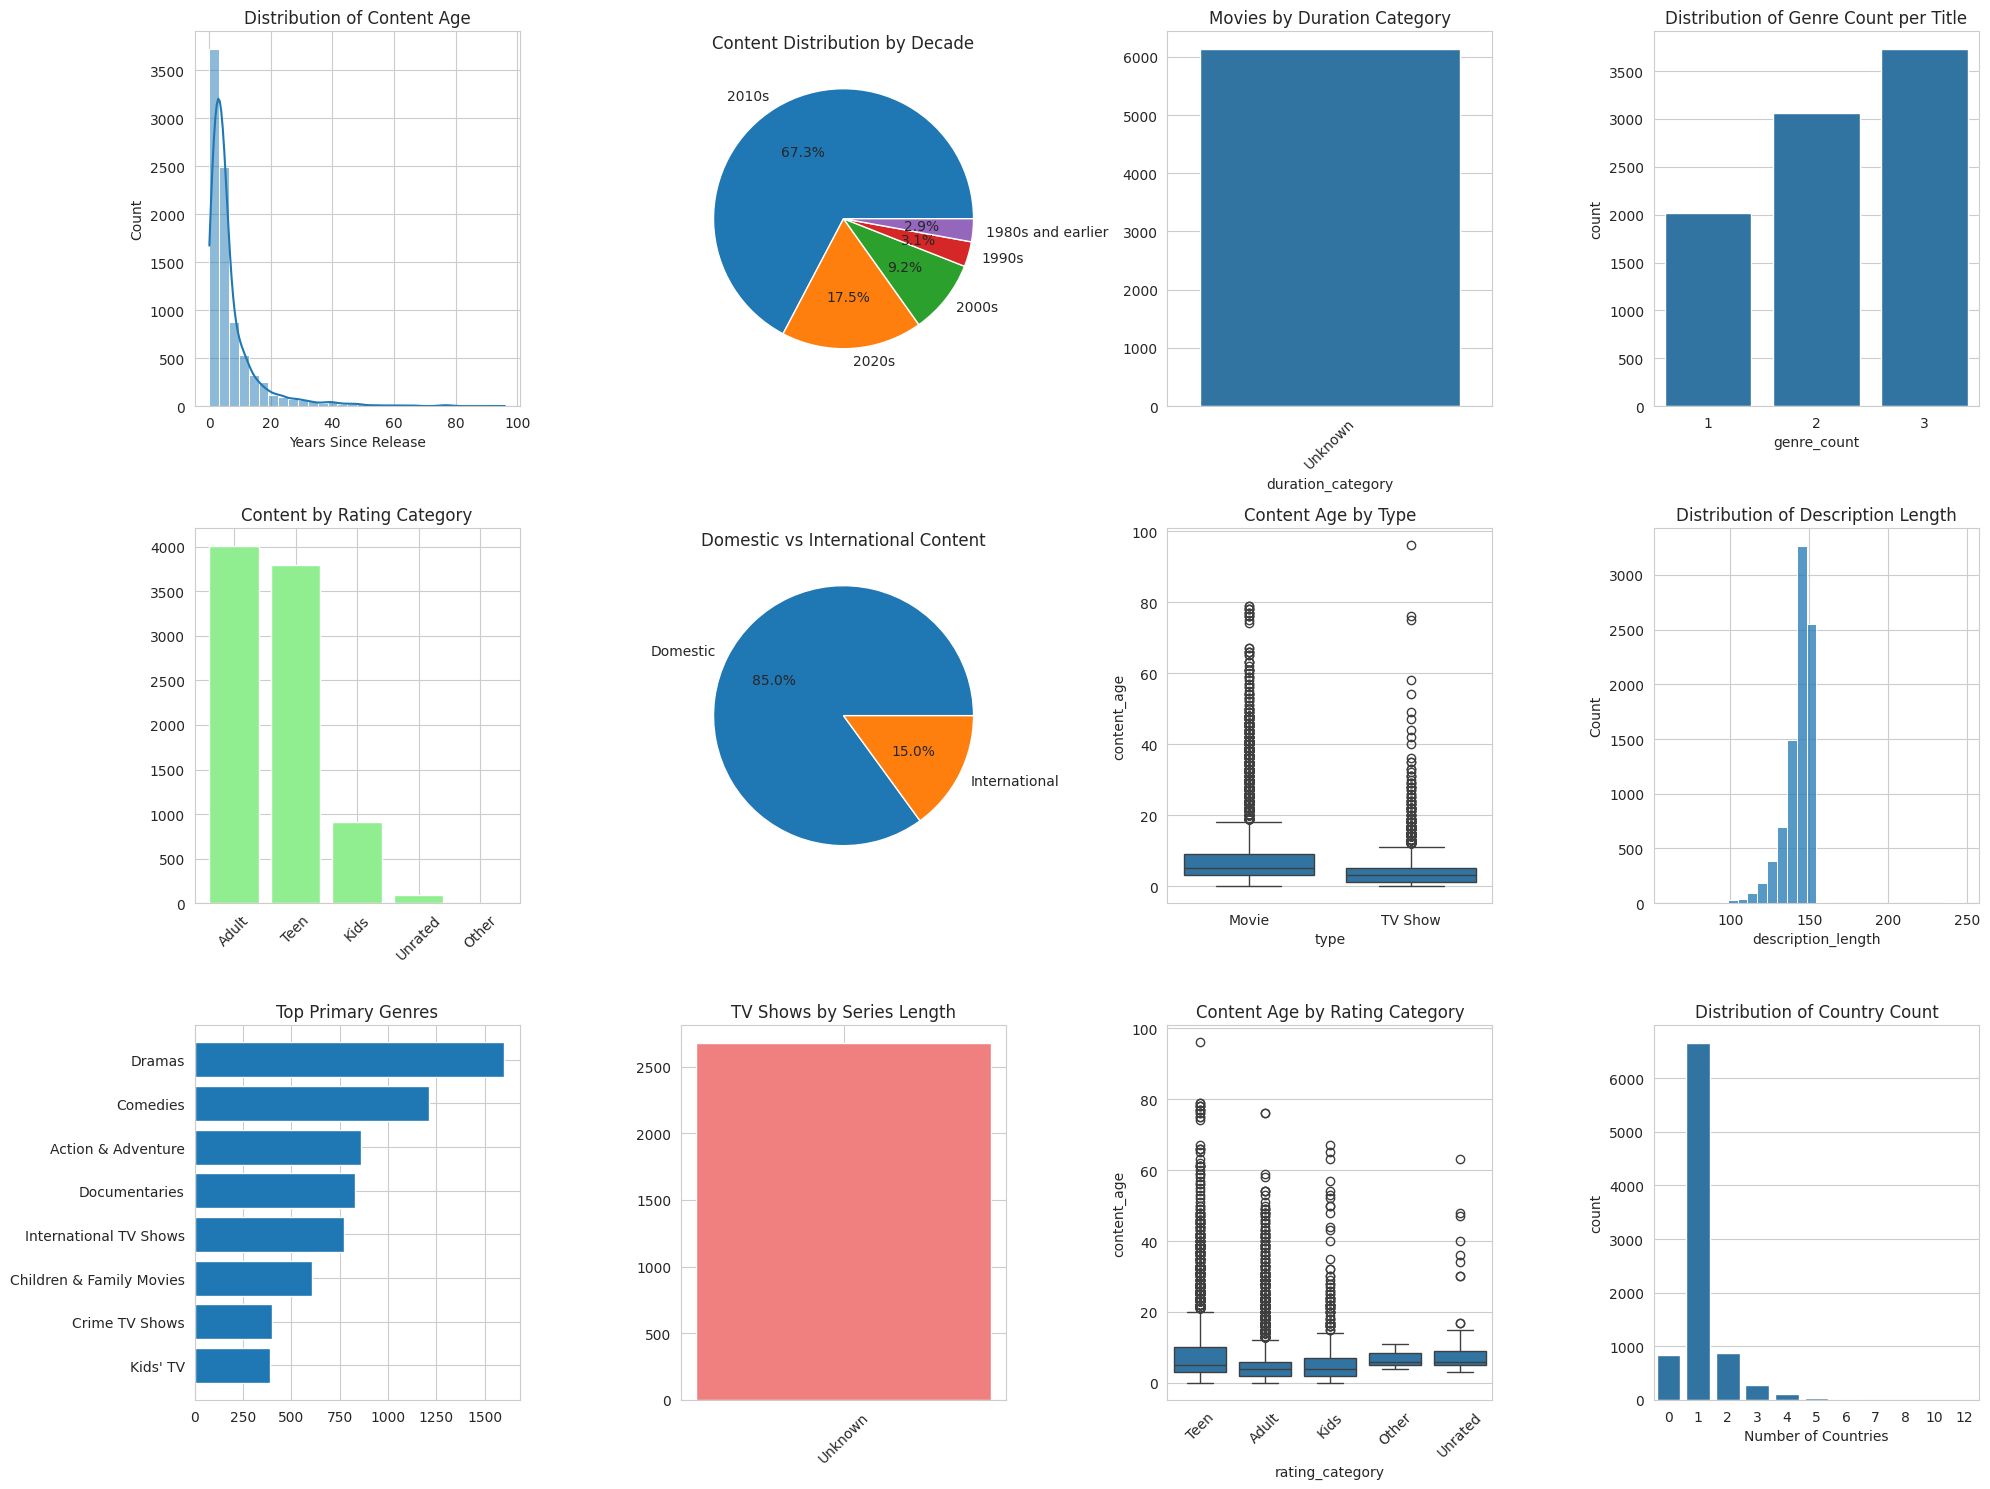

Advanced visualizations completed!


In [23]:
print("=" * 60)
print("ADVANCED VISUALIZATIONS WITH ENGINEERED FEATURES")
print("=" * 60)

plt.figure(figsize=(20, 15))

# Content age distribution
if 'content_age' in df_engineered.columns:
    plt.subplot(3, 4, 1)
    sns.histplot(df_engineered['content_age'], bins=30, kde=True)
    plt.title('Distribution of Content Age')
    plt.xlabel('Years Since Release')

# Decade analysis
if 'decade_category' in df_engineered.columns:
    plt.subplot(3, 4, 2)
    decade_counts = df_engineered['decade_category'].value_counts()
    plt.pie(decade_counts.values, labels=decade_counts.index, autopct='%1.1f%%')
    plt.title('Content Distribution by Decade')

# Duration categories for movies
if 'duration_category' in df_engineered.columns:
    plt.subplot(3, 4, 3)
    duration_counts = df_engineered['duration_category'].value_counts()
    sns.barplot(x=duration_counts.index, y=duration_counts.values)
    plt.title('Movies by Duration Category')
    plt.xticks(rotation=45)

# Genre count distribution
if 'genre_count' in df_engineered.columns:
    plt.subplot(3, 4, 4)
    sns.countplot(data=df_engineered, x='genre_count')
    plt.title('Distribution of Genre Count per Title')

# Rating categories
if 'rating_category' in df_engineered.columns:
    plt.subplot(3, 4, 5)
    rating_cat_counts = df_engineered['rating_category'].value_counts()
    plt.bar(rating_cat_counts.index, rating_cat_counts.values, color='lightgreen')
    plt.title('Content by Rating Category')
    plt.xticks(rotation=45)

# International content
if 'is_international' in df_engineered.columns:
    plt.subplot(3, 4, 6)
    international_counts = df_engineered['is_international'].value_counts()
    plt.pie(international_counts.values, labels=['Domestic', 'International'], autopct='%1.1f%%')
    plt.title('Domestic vs International Content')

# Content age vs type
if 'content_age' in df_engineered.columns and 'type' in df_engineered.columns:
    plt.subplot(3, 4, 7)
    sns.boxplot(data=df_engineered, x='type', y='content_age')
    plt.title('Content Age by Type')

# Description length distribution
if 'description_length' in df_engineered.columns:
    plt.subplot(3, 4, 8)
    sns.histplot(df_engineered['description_length'], bins=30)
    plt.title('Distribution of Description Length')

# Primary genre analysis
if 'primary_genre' in df_engineered.columns:
    plt.subplot(3, 4, 9)
    top_primary_genres = df_engineered['primary_genre'].value_counts().head(8)
    plt.barh(range(len(top_primary_genres)), top_primary_genres.values)
    plt.yticks(range(len(top_primary_genres)), top_primary_genres.index)
    plt.title('Top Primary Genres')
    plt.gca().invert_yaxis()

# Series length for TV shows
if 'series_length' in df_engineered.columns:
    plt.subplot(3, 4, 10)
    series_counts = df_engineered['series_length'].value_counts()
    plt.bar(series_counts.index, series_counts.values, color='lightcoral')
    plt.title('TV Shows by Series Length')
    plt.xticks(rotation=45)

# Content age vs rating category
if 'content_age' in df_engineered.columns and 'rating_category' in df_engineered.columns:
    plt.subplot(3, 4, 11)
    sns.boxplot(data=df_engineered, x='rating_category', y='content_age')
    plt.title('Content Age by Rating Category')
    plt.xticks(rotation=45)

# Country count distribution
if 'country_count' in df_engineered.columns:
    plt.subplot(3, 4, 12)
    sns.countplot(data=df_engineered, x='country_count')
    plt.title('Distribution of Country Count')
    plt.xlabel('Number of Countries')

plt.tight_layout()
plt.show()

print("Advanced visualizations completed!")

CORRELATION ANALYSIS WITH ENGINEERED FEATURES
 Numeric features for correlation: ['release_year', 'content_age', 'decade', 'duration_minutes', 'seasons_count', 'genre_count', 'country_count', 'description_length', 'description_word_count']


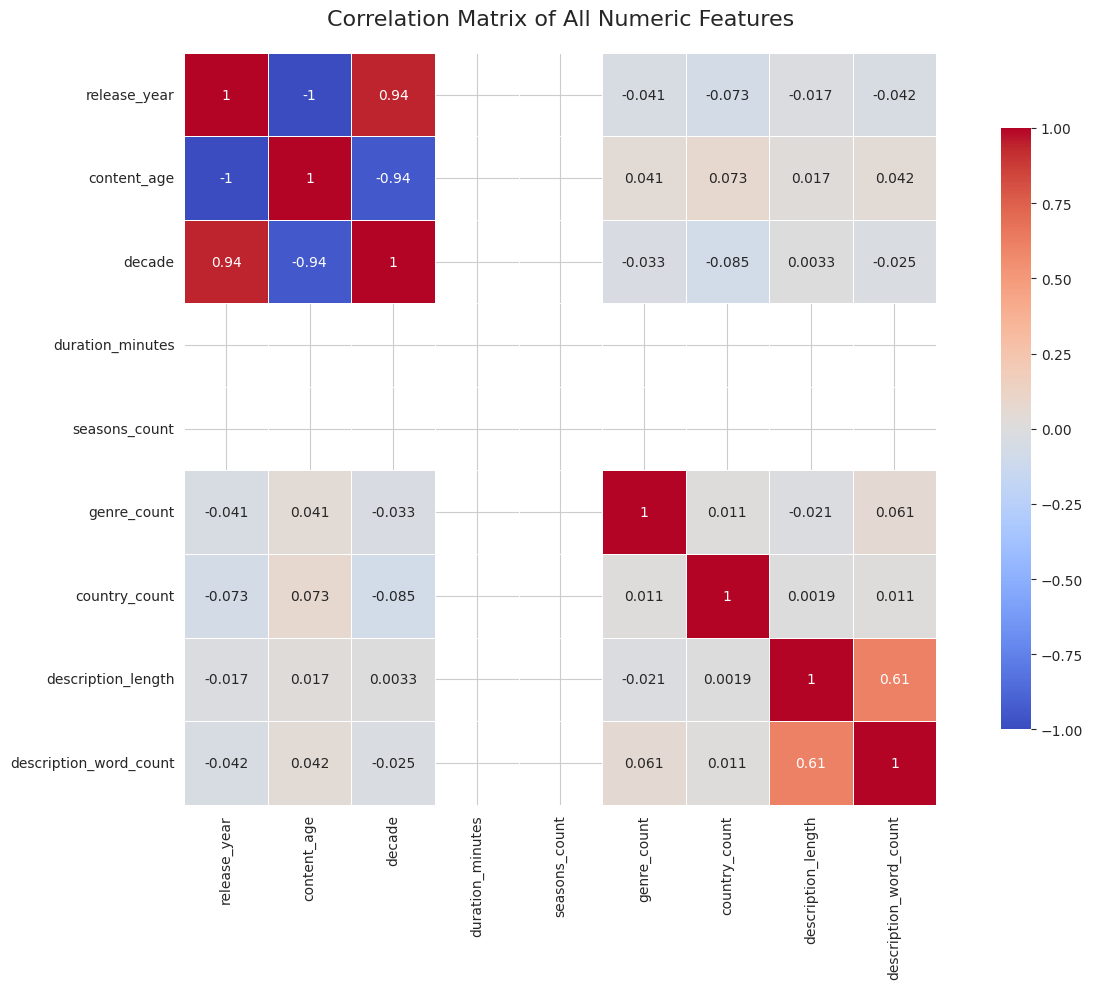


 Strong correlations (|r| > 0.3):
• release_year ↔ content_age: -1.000
• content_age ↔ decade: -0.940
• release_year ↔ decade: 0.940
• description_length ↔ description_word_count: 0.614


In [24]:
print("=" * 60)
print("CORRELATION ANALYSIS WITH ENGINEERED FEATURES")
print("=" * 60)

# Select all numeric columns including engineered ones
numeric_features = df_engineered.select_dtypes(include=[np.number]).columns
print(f" Numeric features for correlation: {list(numeric_features)}")

if len(numeric_features) > 1:
    # Calculate correlation matrix
    correlation_matrix = df_engineered[numeric_features].corr()

    plt.figure(figsize=(14, 10))

    # Create correlation heatmap
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix of All Numeric Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Find and display strong correlations
    threshold = 0.3
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                strong_correlations.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': corr_val
                })

    if strong_correlations:
        print(f"\n Strong correlations (|r| > {threshold}):")
        for corr in sorted(strong_correlations, key=lambda x: abs(x['Correlation']), reverse=True):
            print(f"• {corr['Feature 1']} ↔ {corr['Feature 2']}: {corr['Correlation']:.3f}")
    else:
        print(f"\n No correlations above threshold {threshold} found")

In [26]:
print("FINAL SUMMARY AND KEY INSIGHTS")

print("KEY FINDINGS:")
print("-" * 40)

# Content type distribution
if 'type' in df_engineered.columns:
    type_dist = df_engineered['type'].value_counts(normalize=True) * 100
    print(f"Content Distribution:")
    for content_type, percentage in type_dist.items():
        print(f"   • {content_type}: {percentage:.1f}%")

# Release year insights
if 'release_year' in df_engineered.columns:
    print(f"\n Release Year Range: {df_engineered['release_year'].min()} - {df_engineered['release_year'].max()}")
    print(f"   • Most productive decade: {df_engineered['decade_category'].mode().iloc[0] if 'decade_category' in df_engineered.columns else 'N/A'}")

# Top countries
if 'country' in df_engineered.columns:
    # Get top 3 countries
    all_countries = []
    for countries in df_engineered['country'].dropna():
        if countries != 'Unknown':
            country_list = [country.strip() for country in countries.split(',')]
            all_countries.extend(country_list)

    if all_countries:
        country_counts = Counter(all_countries)
        top_3_countries = country_counts.most_common(3)
        print(f"\n Top 3 Content Producing Countries:")
        for i, (country, count) in enumerate(top_3_countries, 1):
            print(f"   {i}. {country}: {count} titles")

# Rating insights
if 'rating_category' in df_engineered.columns:
    rating_dist = df_engineered['rating_category'].value_counts()
    print(f"\n Most Common Rating Category: {rating_dist.index[0]} ({rating_dist.iloc[0]} titles)")

# Genre insights
if 'primary_genre' in df_engineered.columns:
    top_genre = df_engineered['primary_genre'].value_counts().index[0]
    print(f"\n Most Popular Primary Genre: {top_genre}")

# Duration insights
if 'duration_category' in df_engineered.columns:
    duration_dist = df_engineered['duration_category'].value_counts()
    if 'Medium' in duration_dist.index:
        print(f"\n⏱️ Most movies fall into the 'Medium' duration category (90-120 minutes)")

# Data quality summary
print(f"\n DATA QUALITY SUMMARY:")
print(f"   • Total titles analyzed: {len(df_engineered):,}")
print(f"   • Original features: {len(df_clean.columns)}")
print(f"   • Engineered features: {len(df_engineered.columns) - len(df_clean.columns)}")
print(f"   • Total features: {len(df_engineered.columns)}")

# Missing data summary
missing_summary = df_engineered.isnull().sum().sum()
print(f"   • Remaining missing values: {missing_summary}")

print("\n" + "=" * 60)
print("NETFLIX EDA ANALYSIS COMPLETE!")
print("=" * 60)
print("\n Next Steps:")
print("   1. Save cleaned dataset: df_engineered.to_csv('netflix_cleaned_engineered.csv', index=False)")
print("   2. Use engineered features for machine learning models")
print("   3. Create interactive dashboards with Plotly/Dash")
print("   4. Perform advanced analytics (clustering, recommendation systems)")
print("   5. Document findings in a comprehensive report")

FINAL SUMMARY AND KEY INSIGHTS
KEY FINDINGS:
----------------------------------------
Content Distribution:
   • Movie: 69.6%
   • TV Show: 30.4%

 Release Year Range: 1925 - 2021
   • Most productive decade: 2010s

 Top 3 Content Producing Countries:
   1. United States: 3690 titles
   2. India: 1046 titles
   3. United Kingdom: 806 titles

 Most Common Rating Category: Adult (4009 titles)

 Most Popular Primary Genre: Dramas

 DATA QUALITY SUMMARY:
   • Total titles analyzed: 8,807
   • Original features: 12
   • Engineered features: 14
   • Total features: 26
   • Remaining missing values: 26522

NETFLIX EDA ANALYSIS COMPLETE!

 Next Steps:
   1. Save cleaned dataset: df_engineered.to_csv('netflix_cleaned_engineered.csv', index=False)
   2. Use engineered features for machine learning models
   3. Create interactive dashboards with Plotly/Dash
   4. Perform advanced analytics (clustering, recommendation systems)
   5. Document findings in a comprehensive report


In [28]:
print("EXPORT RESULTS AND DOCUMENTATION")

# Save the cleaned and engineered dataset
output_path = '/content/drive/MyDrive/Colab Notebooks/Netflix EDA/netflix_cleaned_engineered.csv'
df_engineered.to_csv(output_path, index=False)
print(f"Cleaned and engineered dataset saved to: {output_path}")

EXPORT RESULTS AND DOCUMENTATION
Cleaned and engineered dataset saved to: /content/drive/MyDrive/Colab Notebooks/Netflix EDA/netflix_cleaned_engineered.csv
